# MNIST

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.backend import expand_dims
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import regularizers, layers
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import datasets

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

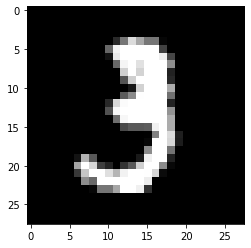

In [8]:
plt.imshow(X_train[10], cmap='gray')

## Image Preprocessing

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train = X_train - 0.5
X_test = X_test - 0.5

In [11]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test = expand_dims(X_test)
X_train = expand_dims(X_train)

In [15]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

## CNN

In [17]:
def initialize_model():
    model = models.Sequential()

    model.add(layers.Conv2D(8, (4,4), input_shape=(28, 28, 1), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())

    model.add(layers.Dense(10, activation='relu')) # intermediate layer

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [19]:
model = initialize_model()

es = EarlyStopping(patience=2)

model.fit(X_train, y_train_cat,
          epochs=10,
          batch_size=32, 
          verbose=1,
          callbacks=[es],
          validation_data=(X_test, y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3533 - accuracy: 0.8927 - val_loss: 0.1341 - val_accuracy: 0.9620
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1255 - accuracy: 0.9627 - val_loss: 0.1075 - val_accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0990 - accuracy: 0.9704 - val_loss: 0.0830 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0848 - accuracy: 0.9752 - val_loss: 0.1004 - val_accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9778 - val_loss: 0.0754 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0675 - accuracy: 0.9797 - val_loss: 0.0726 - val_accuracy: 0.9770
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0623 - accuracy: 0.9809 - val_loss: 0.0814 - val_accuracy: